In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [ ]:
# loading the data from sklearn
data = sklearn.datasets.load_breast_cancer()

In [ ]:
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [ ]:
data_frame = pd.DataFrame(data.data, columns=data.feature_names)

In [ ]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_frame.shape

(569, 30)

In [ ]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [ ]:
x=data_frame

In [ ]:
data_frame.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
y = data.target

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(xtrain)

X_test_std = scaler.transform(xtest)

In [ ]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the Meural Network

history = model.fit(X_train_std, ytrain, validation_split=0.1, epochs=10)

Epoch 1/10
12/12 [==============================] - 1s 42ms/step - loss: 0.5995 - accuracy: 0.7207 - val_loss: 0.4012 - val_accuracy: 0.8750
Epoch 2/10
12/12 [==============================] - 0s 7ms/step - loss: 0.4275 - accuracy: 0.8520 - val_loss: 0.2970 - val_accuracy: 0.9500
Epoch 3/10
12/12 [==============================] - 0s 9ms/step - loss: 0.3238 - accuracy: 0.8883 - val_loss: 0.2422 - val_accuracy: 0.9750
Epoch 4/10
12/12 [==============================] - 0s 9ms/step - loss: 0.2627 - accuracy: 0.9106 - val_loss: 0.2109 - val_accuracy: 0.9750
Epoch 5/10
12/12 [==============================] - 0s 8ms/step - loss: 0.2229 - accuracy: 0.9218 - val_loss: 0.1862 - val_accuracy: 0.9750
Epoch 6/10
12/12 [==============================] - 0s 8ms/step - loss: 0.1960 - accuracy: 0.9302 - val_loss: 0.1684 - val_accuracy: 0.9750
Epoch 7/10
12/12 [==============================] - 0s 9ms/step - loss: 0.1770 - accuracy: 0.9469 - val_loss: 0.1545 - val_accuracy: 0.9750
Epoch 8/10
12/12 [=

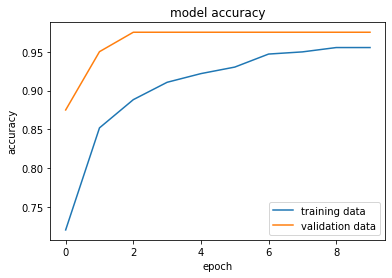

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

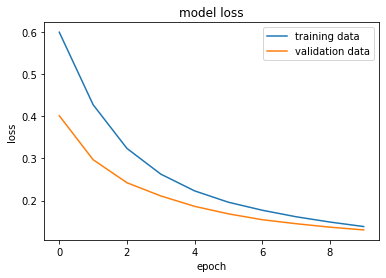

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
loss, accuracy = model.evaluate(X_test_std, ytest)
print(accuracy)

6/6 [==============================] - 0s 8ms/step - loss: 0.1278 - accuracy: 0.9649
0.9649122953414917


In [ ]:
print(X_test_std.shape)
print(X_test_std[0])

(171, 30)
[-0.03064165 -1.40905263 -0.04533245 -0.15159436  2.04738129 -0.11152619
  0.18520122  0.50694177  0.65972243  0.25993362  0.59991392  2.86518826
  0.7252122   0.15759611  0.97180277  0.38325056  0.58402977  2.91474791
 -0.39262883  0.71060836 -0.32717834 -1.69326148 -0.36711253 -0.38748116
  0.32463736 -0.76531515 -0.56583996 -0.18637835 -1.24009403 -0.63237194]


In [ ]:
Y_pred = model.predict(X_test_std)

In [ ]:
print(Y_pred.shape)
print(Y_pred[0])

(171, 2)
[0.36427605 0.5222354 ]


In [ ]:
print(X_test_std)

[[-0.03064165 -1.40905263 -0.04533245 ... -0.18637835 -1.24009403
  -0.63237194]
 [ 0.27114352 -0.07042144  0.24316597 ...  0.55255621  0.12343229
   0.03480395]
 [-1.29458896 -0.29616025 -1.30107332 ... -1.37896262  0.28494725
  -0.29194257]
 ...
 [-0.62237728 -0.26455682 -0.6721296  ... -0.78719139 -0.17749559
  -0.54753825]
 [-0.54249297 -1.20137292 -0.54033047 ... -0.34383066 -0.3611126
   0.22745852]
 [ 0.04628399  0.25238507  0.04482331 ...  0.31871616 -0.60423512
  -0.30124691]]


In [ ]:
print(Y_pred)

[[3.64276052e-01 5.22235394e-01]
 [4.43148285e-01 6.46785915e-01]
 [8.14895630e-02 9.53026712e-01]
 [9.86987174e-01 6.73919916e-04]
 [4.09156442e-01 3.95833939e-01]
 [8.69394898e-01 3.03318202e-02]
 [2.45516241e-01 7.45727181e-01]
 [8.48113000e-02 9.41194773e-01]
 [1.84295714e-01 9.11794186e-01]
 [2.26501018e-01 8.32653642e-01]
 [5.07024050e-01 5.70892215e-01]
 [2.60785192e-01 8.06078315e-01]
 [2.55001545e-01 7.90930271e-01]
 [3.72082949e-01 7.95350790e-01]
 [1.19061589e-01 9.30146098e-01]
 [7.84866452e-01 2.36214876e-01]
 [1.22624606e-01 8.99779797e-01]
 [1.23469055e-01 8.54807854e-01]
 [2.14701116e-01 8.45244110e-01]
 [7.79483557e-01 2.95775235e-02]
 [3.61545682e-02 3.94600898e-01]
 [6.09170496e-02 8.39203298e-01]
 [2.29759932e-01 9.13078666e-01]
 [6.62195086e-02 9.07994866e-01]
 [1.39179468e-01 6.32051110e-01]
 [7.84641504e-01 7.53749311e-02]
 [2.23167390e-01 7.20855474e-01]
 [2.81254888e-01 3.83403718e-01]
 [8.53437424e-01 1.32669955e-01]
 [8.30986023e-01 1.30358607e-01]
 [3.015792

In [ ]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [ ]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1]


In [ ]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

[[0.10707286 0.8896824 ]]
[1]
The tumor is Benign


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
da